# Shopify Summer 2022 Data Science Intern Challenge

***Allistair Cota***

***allistair.cota@gmail.com***

## Question 1

To answer this question, I will read in the sneakers dataset and perform some preliminary EDA in order to provide my recommendations.

### Import Required Libraries

The required libraries are Pandas, Matplotlib and Seaborn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [3]:
df = pd.read_csv('data/sneakers-data.csv')

In [4]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
df.shape

(5000, 7)

 The dataset has 5,000 rows and 7 columns. I will now check the column names and data types.

### Data Dictionary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


- `order_id`: integer, the table primary key which is unique ID for every order.
- `shop_id`: integer, the shop/vendor ID at which the order was placed.
- `user_id`: integer, the customer ID who placed the order.
- `order_amount`: integer, the value of the transaction.
- `total_items`: integer, the number of items purchased in the order.
- `payment_method`: string object, describing how the payment was made.
- `created_at`: string object, describing the date of the transaction. By visual inspection of the data frame, this column can be converted to a datetime object.

### Check for Duplicate Rows

In [7]:
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

### Check for Missing Values

In [8]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

There are no missing values in the dataset.

### Converting `created_at` to datetime format

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


The `created_at` column has been successfully converted to a datetime format. 
I will now verify the time interval that this dataset covers.

In [11]:
print(f'Last Order Date: {max(df["created_at"])}')
print(f'First Order Date: {min(df["created_at"])}')

print(f'Order Date Interval for this dataset: {max(df["created_at"]) - min(df["created_at"])}')

Last Order Date: 2017-03-30 23:55:35
First Order Date: 2017-03-01 00:08:09
Order Date Interval for this dataset: 29 days 23:47:26


This dataset includes orders that span a ~30 day window. Hence I can look at the entire dataset to analyze metrics that represent a 30 day window of orders.

### Looking at Boxplot Distributions

I will now examine the boxplot distributions of the order amount and total items per order. The boxplot will indicate any outliers present for each of the variables.

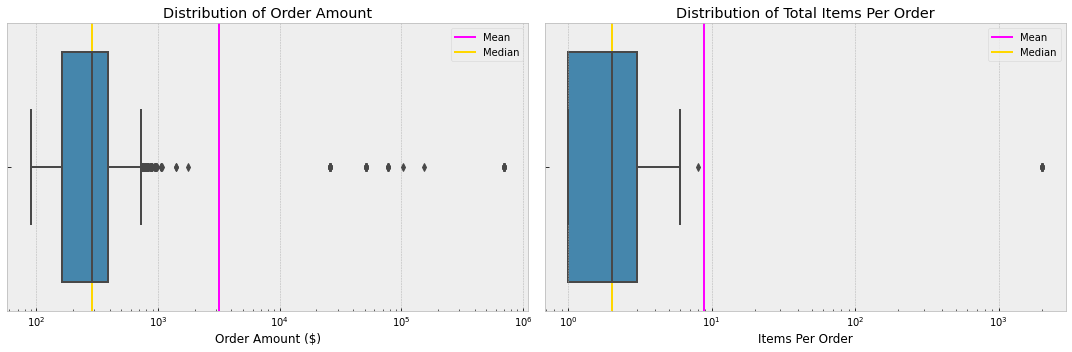

In [12]:
plt.subplots(1, 2, figsize=(15,5))

# Boxplot for Order Amount
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='order_amount')
plt.title('Distribution of Order Amount')
plt.axvline(df['order_amount'].mean(), color='magenta', label='Mean')
plt.axvline(df['order_amount'].median(), color='gold', label='Median')
plt.xscale('log')
plt.legend()
plt.xlabel('Order Amount ($)')

# Boxplot for Total Items
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='total_items')
plt.title('Distribution of Total Items Per Order')
plt.axvline(df['total_items'].mean(), color='magenta', label='Mean')
plt.axvline(df['total_items'].median(), color='gold', label='Median')
plt.xscale('log')
plt.legend()
plt.xlabel('Items Per Order')

plt.tight_layout()
plt.show()

The outliers for both variables are some orders of magnitude greater than their median values, hence a log scale is used for both plots. There are a number of outliers related to order amount, with the biggest outlier ordered valued at roughly ~$700k. There is a also an outlier in total items per order at ~2,000 items. The distributions for both variables are highly right-skewed. It appears that these outliers are affecting the mean value by shifting it towards the direction of skewness.

I will now look at the variation of order amount with total items per order.

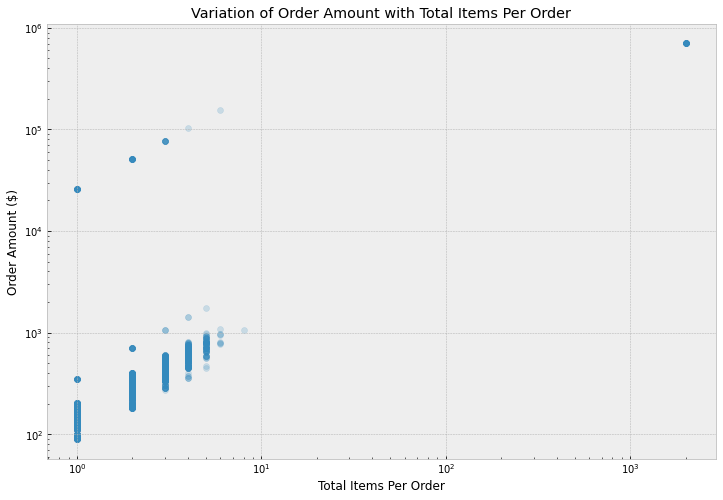

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(df['total_items'], df['order_amount'], alpha=0.2)
plt.title('Variation of Order Amount with Total Items Per Order')
plt.xlabel('Total Items Per Order')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Order Amount ($)')
plt.show()

The above plot shows that the orders with ~2000 items are resulting in the ~\\$700k order value. However there are also some orders with low quantities but still very high order amounts (> \$20k). I will now look at a tabular breakdown of order quantities and order amounts.

In [14]:
# Show min, max, and count of order amounts grouped by total items
df.groupby('total_items').agg({'order_amount': ['min', 'max', 'count']}).round(2).\
    rename(columns={'order_amount': 'Order Amount ($)'}).rename_axis('Total Items Per Order')

Order Amount ($)              
                                   min     max count
Total Items Per Order                               
1                                   90   25725  1830
2                                  180   51450  1832
3                                  270   77175   941
4                                  360  102900   293
5                                  450    1760    77
6                                  774  154350     9
8                                 1064    1064     1
2000                            704000  704000    17

The table above shows that there were 17 orders with 2000 items, and each of those orders were worth \\$704,000. This might be a reoccurring purchase - I will confirm this by looking at the orders with 2000 items specifically.

In [15]:
# Look at transactions that had 2000 items
df[df['total_items']==2000].sort_values(by='created_at')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


The observations from the table above are as follows:
- Only customer (user_id 607) places a bulk order of 2000 sneakers worth $704,000 at the same shop (shop_id 42).
- All of the bulk orders occur at 4 AM.
- There are 4 days where multiple bulk orders are placed on the same day at the same time.
- All of these bulk orders are purchased via credit card.

I find it strange that multiple orders were able to made on the same day at the same time. Perhaps orders times in this dataset are not rounded to the nearest second but maybe the nearest hour. To confirm this, I will print the value counts of the `created_at` column.

In [16]:
df['created_at'].value_counts()

2017-03-28 04:00:00    3
2017-03-02 04:00:00    2
2017-03-24 04:00:00    2
2017-03-07 15:30:37    2
2017-03-13 02:38:34    2
                      ..
2017-03-02 08:16:06    1
2017-03-28 21:40:46    1
2017-03-11 02:49:42    1
2017-03-22 05:27:28    1
2017-03-18 15:48:18    1
Name: created_at, Length: 4991, dtype: int64

Examining the value counts above for all the orders, it does appear that the `created_at` column is rounded to the nearest second.

There are many possible explanations for this anomaly. Perhaps these are incorrect entries or perhaps these are fraudulent credit card transactions. It could also be possible that a bot is being used to make these purchases, perhaps explaining why multiple purchases were made at the same time when rounded to the nearest second.

I will now visualize the distribution of total items per order to gain better insight on how many sneaker pairs are being purchased by the majority of customers.

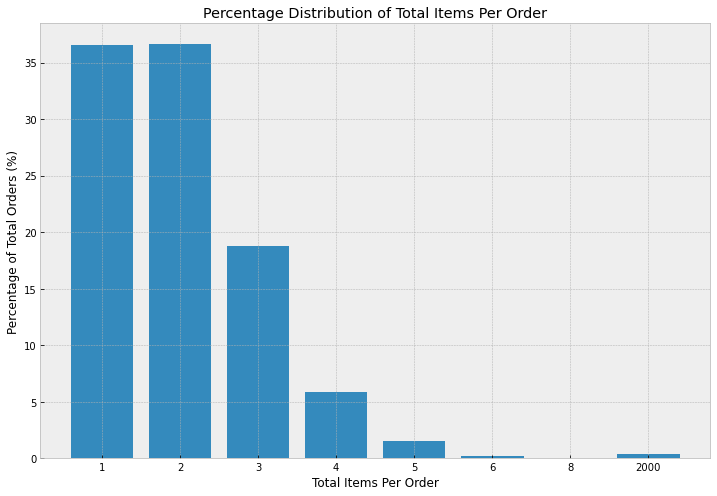

In [17]:
# Obtain value counts of total items as a percentage of total orders
df_normalize = (df['total_items'].value_counts(normalize = True)*100).sort_index()

plt.figure(figsize=(12,8))
plt.bar(df_normalize.index.astype('str'), df_normalize.values)
plt.title('Percentage Distribution of Total Items Per Order')
plt.xlabel('Total Items Per Order')
plt.ylabel('Percentage of Total Orders (%)')
plt.show()

We see that ~92% of the orders had 1, 2, or 3 sneaker pairs purchased, which an addition 5% of the orders purchasing 4 sneaker pairs. As was mentioned earlier, some orders with low quantities still have a high order amount of more than \\$20k. I will now look at the cost per sneaker pair, which can be calculated by dividing the order amount by total items per order since each store sells only one model of sneakers.

In [18]:
df['cost_per_item'] = df['order_amount'] / df['total_items']

In [19]:
metrics = ['min', 'max', 'mean', 'median']

# Show min, max, mean, and median of order amounts and cost per item grouped by total items
df.groupby('total_items').agg({'order_amount': metrics, 'cost_per_item': metrics}).round(2).\
    rename(columns={'order_amount': 'Order Amount ($)',
                    'cost_per_item': 'Cost Per Item ($)'}).rename_axis('Total Items')

Order Amount ($)                              Cost Per Item ($)  \
                         min     max       mean    median               min   
Total Items                                                                   
1                         90   25725     417.36     153.0              90.0   
2                        180   51450     750.22     306.0              90.0   
3                        270   77175    1191.08     459.0              90.0   
4                        360  102900     947.69     592.0              90.0   
5                        450    1760     759.35     765.0              90.0   
6                        774  154350   17940.00     948.0             129.0   
8                       1064    1064    1064.00    1064.0             133.0   
2000                  704000  704000  704000.00  704000.0             352.0   

                                      
                 max     mean median  
Total Items                           
1            25725.0   417.36  153.0  
2            25725.0   375.11  153.0  
3            25725.0   397.03  153.0  
4            25725.0   236.92  148.0  
5              352.0   151.87  153.0  
6            25725.0  2990.00  158.0  
8              133.0   133.00  133.0  
2000           352.0   352.00  352.0

The table above shows that there are some sneakers costing \\$25,725 per pair.

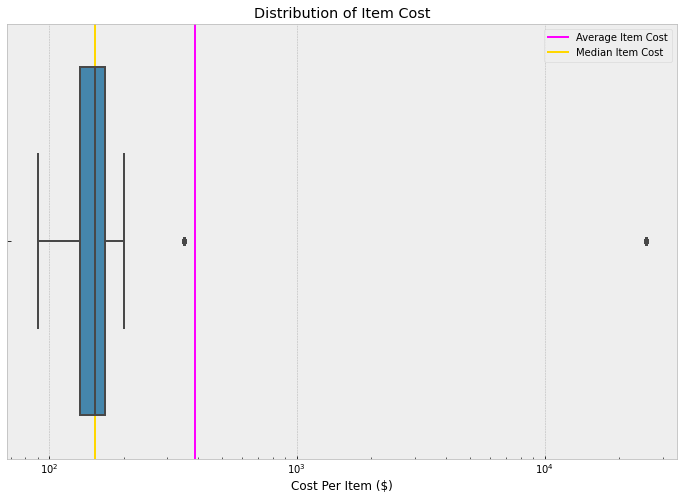

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='cost_per_item')
plt.axvline(df['cost_per_item'].mean(), color='magenta', label='Average Item Cost')
plt.axvline(df['cost_per_item'].median(), color='gold', label='Median Item Cost')
plt.xscale('log')
plt.title('Distribution of Item Cost')
plt.xlabel('Cost Per Item ($)')
plt.legend()
plt.show()

The majority of sneakers cost between \\$90 - \$200, but there is a large outlier of \\$25,725.

Hence, these outliers and right skewed distribution of the sneaker cost as well as for total items affect the mean value calculation by shifting it towards the tail end of the distribution.

### Question 1a Answer

As shown above, the issue with reporting the average order value is that the mean value is affected greatly by outliers in this dataset. The mean value would be an appropriate measure if the order values were normally distributed, but this is not the case for this dataset as we instead see a right-skewed distribution.

### Question 1b Answer

If the business objective is to gain an insight on the ***amount of each order***, I would recommend reporting the **median order amount**. If the business objective is to gain an insight on the ***cost of each sneaker***, I would recommend calculating the cost per sneaker by dividing each order amount with the total number of items for each order, and then report the **median cost per sneaker**.

### Question 1c Answer

In [23]:
print(f'The median order amount is ${"{:.2f}".format(df["order_amount"].median())}.')
print(f'The median price per sneaker is ${"{:.2f}".format(df["cost_per_item"].median())}.')

The median order amount is $284.00.
The median price per sneaker is $153.00.


## Question 2

For each of the SQL questions, the answer to the question is stated in markdown followed by the SQL query that was used, followed by a screenshot of the query results from the w3schools page. Note that the SQL queries have been pasted into the code cells below - the cells themselves will not execute within this notebook.

### Question 2a.

A total of 54 orders were shipped by Speedy Express.

In [22]:
%%sql

SELECT
    Shippers.ShipperName,
    COUNT(Orders.OrderId) AS Number_Of_Orders
FROM
    Orders
INNER JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';

UsageError: Cell magic `%%sql` not found.


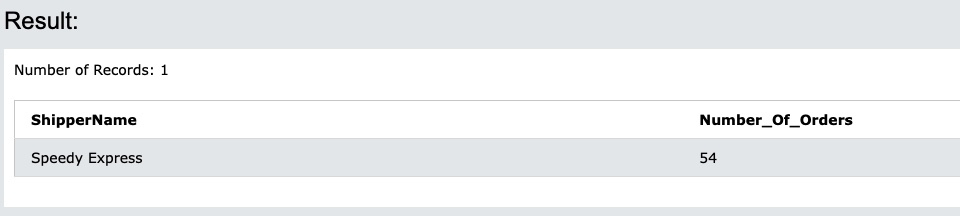

### Question 2b.

The last name of the employee with the most orders is Peacock who has 40 orders.

In [ ]:
%%sql

SELECT
    Orders.EmployeeID,
    Employees.LastName,
    COUNT(Orders.OrderID) AS Number_Of_Orders
FROM
    Orders
INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY
    Orders.EmployeeID,
    Employees.LastName
ORDER BY Number_Of_Orders DESC LIMIT 1;

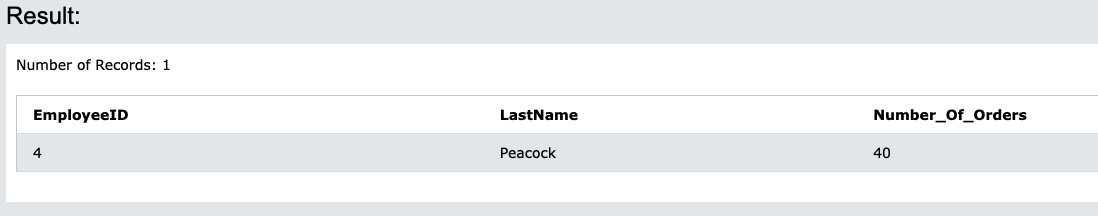

### Question 2c.

The product that was ordered the most by customers in Germany was Boston Crab Meat (Product ID: 40), of which 160 units were ordered.

In [ ]:
%%sql

SELECT 
    sq.ProductID,
    Products.ProductName,
    SUM(sq.Quantity) AS Total_Quantity
FROM
    (SELECT 
        ProductID, Quantity
    FROM
        OrderDetails
    WHERE
        OrderID IN (SELECT 
                OrderID
            FROM
                Orders
            WHERE
                CustomerID IN (SELECT 
                        CustomerID
                    FROM
                        Customers
                    WHERE
                        Country = 'Germany'))) sq
INNER JOIN Products ON sq.ProductID = Products.ProductID
GROUP BY sq.ProductID
ORDER BY Total_Quantity DESC
LIMIT 1;

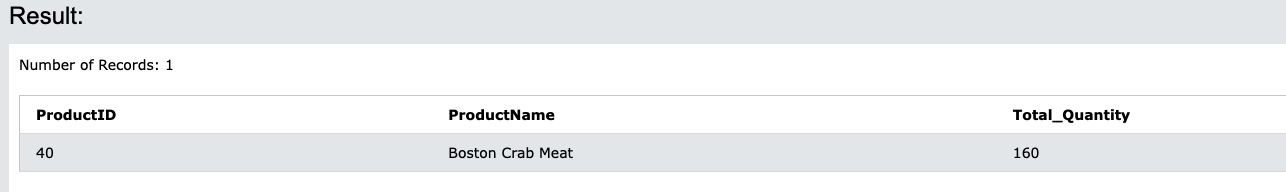